## **Challenge Técnico (Core)**

### **Objetivo:**
Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

### **Pasos del Challenge:**

**1. Registro en Kaggle y Elección de Competencia:**

 - Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.

 - Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).


 **2. Carga y Exploración Inicial de Datos:**

 - Descargar el dataset de la competencia.

 - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

 - Identificar y documentar valores faltantes y outliers.


 **3. Análisis Exploratorio de Datos (EDA):**

 - Calcular estadísticas descriptivas básicas.

 - Crear visualizaciones para entender la distribución de las variables y sus relaciones.

 - Detectar y tratar valores faltantes y outliers.


 **4. Preprocesamiento de Datos:**

 - Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).

 - Dividir el dataset en conjuntos de entrenamiento y prueba.


 **5. Implementación de Modelos y Benchmark:**

 - Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.

 - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

 - Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.

 - Comparar el rendimiento de los modelos utilizando métricas adecuadas.


 **6. Documentación y Entrega:**

 - Documentar todo el proceso en un notebook de Jupyter.

 - Subir el notebook, los resultados y cualquier script adicional a un repositorio de GitHub.

 - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub

### **Dataset Description**
### **Overview**

**The data has been split into two groups:**

- training set (train.csv)

- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

| Variable   | Definition                              | Key                                      |
|------------|----------------------------------------|------------------------------------------|
| Survival   | Survival                               | 0 = No, 1 = Yes                         |
| Pclass     | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd               |
| Sex        | Sex                                    |                                          |
| Age        | Age in years                           |                                          |
| Sibsp      | # of siblings / spouses aboard Titanic |                                          |
| Parch      | # of parents / children aboard Titanic |                                          |
| Ticket     | Ticket number                          |                                          |
| Fare       | Passenger fare                         |                                          |
| Cabin      | Cabin number                           |                                          |
| Embarked   | Port of Embarkation                   | C = Cherbourg, Q = Queenstown, S = Southampton |



In [1]:
import pandas as pd

# Especifica las rutas correctas de los archivos
test_file = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\test.csv"
train_file = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\train.csv"

try:
    # Carga los datasets
    test_data = pd.read_csv(test_file)
    train_data = pd.read_csv(train_file)

    # Convertir nombres de columnas a minúsculas
    train_data.columns = train_data.columns.str.lower()
    test_data.columns = test_data.columns.str.lower()

    # Mostrar la forma de cada dataset
    print(f"Forma del dataset 'train.csv': {train_data.shape}")
    print(f"Forma del dataset 'test.csv': {test_data.shape}")

    # Mostrar información básica de cada dataset
    print("\nInformación del archivo 'train.csv':")
    print(train_data.info())

    print("\nInformación del archivo 'test.csv':")
    print(test_data.info())

    # Agrega una columna que indique la fuente de cada fila
    train_data['source'] = 'train'
    test_data['source'] = 'test'

    # Combina los datasets
    combined_data = pd.concat([train_data, test_data], ignore_index=True)

    # Crea el diccionario de definiciones de variables
    data_dictionary = {
        "survival": "Survival (0 = no, 1 = yes)",
        "pclass": "Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)",
        "sex": "Sex of the passenger",
        "age": "Age in years",
        "sibsp": "# of siblings/spouses aboard the Titanic",
        "parch": "# of parents/children aboard the Titanic",
        "ticket": "Ticket number",
        "fare": "Passenger fare",
        "cabin": "Cabin number",
        "embarked": "Port of embarkation (c = cherbourg, q = queenstown, s = southampton)",
        "source": "Dataset source (train or test)"
    }

    # Muestra el diccionario
    print("\nDiccionario de datos:")
    for variable, definition in data_dictionary.items():
        print(f"{variable}: {definition}")

    # Muestra un resumen del dataset combinado
    print("\nInformación del dataset combinado:")
    print(combined_data.info())

    print("\nPrimeras filas del dataset combinado:")
    print(combined_data.head())

    print("\nForma (shape) del dataset combinado:")
    print(combined_data.shape)

    print("\nValores faltantes por columna:")
    print(combined_data.isnull().sum())

    print("\nNúmero de filas duplicadas:")
    print(combined_data.duplicated().sum())

    # Guarda el dataset combinado en un nuevo archivo CSV (opcional)
    output_file = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\combined.csv"
    combined_data.to_csv(output_file, index=False)
    print(f"\nEl dataset combinado se guardó en: {output_file}")

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Se produjo un error: {e}")

Forma del dataset 'train.csv': (891, 12)
Forma del dataset 'test.csv': (418, 11)

Información del archivo 'train.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Información del archivo 'test.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data column

In [2]:
# Lista de columnas irrelevantes para el análisis
irrelevant_columns = ['passengerid', 'ticket', 'cabin', 'name']

# Eliminar las columnas irrelevantes del dataset combinado
combined_data_cleaned = combined_data.drop(columns=irrelevant_columns, errors='ignore')
combined_data_cleaned = combined_data_cleaned.drop(columns=['fare'], errors='ignore')

# Mostrar las columnas restantes
print("\nColumnas restantes después de eliminar las irrelevantes:")
print(combined_data_cleaned.columns)

# Identificar las columnas restantes después de limpiar el dataset
columns_to_convert = {
    'survival': 'category',  # Puede ser categórica (0 = No, 1 = Yes)
    'pclass': 'category',    # Clase de ticket (1, 2, 3)
    'sex': 'category',       # Género del pasajero ('male', 'female')
    'age': 'float',          # Edad en años
    'sibsp': 'int',          # Número de hermanos/esposos a bordo
    'parch': 'int',          # Número de padres/hijos a bordo
    'embarked': 'category',  # Puerto de embarque ('C', 'Q', 'S')
    'source': 'category'     # Fuente del dato ('train', 'test')
}

# Cambiar los tipos de datos
for col, dtype in columns_to_convert.items():
    if col in combined_data_cleaned.columns:
        combined_data_cleaned[col] = combined_data_cleaned[col].astype(dtype)

# Verificar los cambios realizados
print("\nTipos de datos después de la conversión:")
print(combined_data_cleaned.dtypes)


Columnas restantes después de eliminar las irrelevantes:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'source'],
      dtype='object')

Tipos de datos después de la conversión:
survived     float64
pclass      category
sex         category
age          float64
sibsp          int64
parch          int64
embarked    category
source      category
dtype: object


In [3]:
# Ignorar las columnas 'source' y 'survived'
data_for_analysis = combined_data_cleaned.drop(columns=['source', 'survived'], errors='ignore')

# Identificar columnas con valores faltantes
missing_values = data_for_analysis.isnull().sum()
print("\nValores faltantes por columna (excluyendo 'survived' y 'source'):")
print(missing_values[missing_values > 0])

# Tratamiento de valores faltantes por tipo de columna
# 1. Para columnas categóricas
categorical_columns = data_for_analysis.select_dtypes(include='category').columns
for col in categorical_columns:
    if data_for_analysis[col].isnull().sum() > 0:
        mode_value = data_for_analysis[col].mode()[0]  # Moda de la columna
        data_for_analysis[col] = data_for_analysis[col].fillna(mode_value)
        print(f"Imputados valores faltantes en columna categórica '{col}' con su moda: {mode_value}")

# 2. Para columnas numéricas
numerical_columns = data_for_analysis.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    if data_for_analysis[col].isnull().sum() > 0:
        # Decidir entre media o mediana según la distribución
        std_dev = data_for_analysis[col].std()  # Desviación estándar
        mean_value = data_for_analysis[col].mean()
        median_value = data_for_analysis[col].median()
        
        if std_dev / mean_value > 0.5:  # Si la desviación estándar es mayor al 50% de la media
            data_for_analysis[col] = data_for_analysis[col].fillna(median_value)  # Usar la mediana
            print(f"Imputados valores faltantes en columna numérica '{col}' con su mediana: {median_value}")
        else:
            data_for_analysis[col] = data_for_analysis[col].fillna(mean_value)  # Usar la media
            print(f"Imputados valores faltantes en columna numérica '{col}' con su media: {mean_value:.2f}")

# Verificar nuevamente los valores faltantes
print("\nValores faltantes después de la imputación (excluyendo 'survived' y 'source'):")
print(data_for_analysis.isnull().sum())

# Mostrar las primeras filas del dataset después del tratamiento
print("\nPrimeras filas del dataset después del tratamiento (excluyendo 'survived' y 'source'):")
print(data_for_analysis.head())


Valores faltantes por columna (excluyendo 'survived' y 'source'):
age         263
embarked      2
dtype: int64
Imputados valores faltantes en columna categórica 'embarked' con su moda: S
Imputados valores faltantes en columna numérica 'age' con su media: 29.88

Valores faltantes después de la imputación (excluyendo 'survived' y 'source'):
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

Primeras filas del dataset después del tratamiento (excluyendo 'survived' y 'source'):
  pclass     sex   age  sibsp  parch embarked
0      3    male  22.0      1      0        S
1      1  female  38.0      1      0        C
2      3  female  26.0      0      0        S
3      1  female  35.0      1      0        S
4      3    male  35.0      0      0        S


In [4]:
# Estadísticas descriptivas para columnas numéricas
numerical_stats = data_for_analysis.describe().round(2)

print("\nEstadísticas descriptivas para columnas numéricas:")
print(numerical_stats)

# Seleccionar columnas categóricas ignorando 'source'
categorical_columns = data_for_analysis.select_dtypes(include='category').columns

# Estadísticas descriptivas para columnas categóricas
categorical_stats = data_for_analysis[categorical_columns].describe()

print("\nEstadísticas descriptivas para columnas categóricas:")
print(categorical_stats)

# Resumen adicional para variables categóricas con frecuencias
print("\nFrecuencias de categorías por columna categórica:")
for col in categorical_columns:
    print(f"\n{col} - Frecuencia de categorías:")
    print(data_for_analysis[col].value_counts())


Estadísticas descriptivas para columnas numéricas:
           age    sibsp    parch
count  1309.00  1309.00  1309.00
mean     29.88     0.50     0.39
std      12.88     1.04     0.87
min       0.17     0.00     0.00
25%      22.00     0.00     0.00
50%      29.88     0.00     0.00
75%      35.00     1.00     0.00
max      80.00     8.00     9.00

Estadísticas descriptivas para columnas categóricas:
        pclass   sex embarked
count     1309  1309     1309
unique       3     2        3
top          3  male        S
freq       709   843      916

Frecuencias de categorías por columna categórica:

pclass - Frecuencia de categorías:
pclass
3    709
1    323
2    277
Name: count, dtype: int64

sex - Frecuencia de categorías:
sex
male      843
female    466
Name: count, dtype: int64

embarked - Frecuencia de categorías:
embarked
S    916
C    270
Q    123
Name: count, dtype: int64


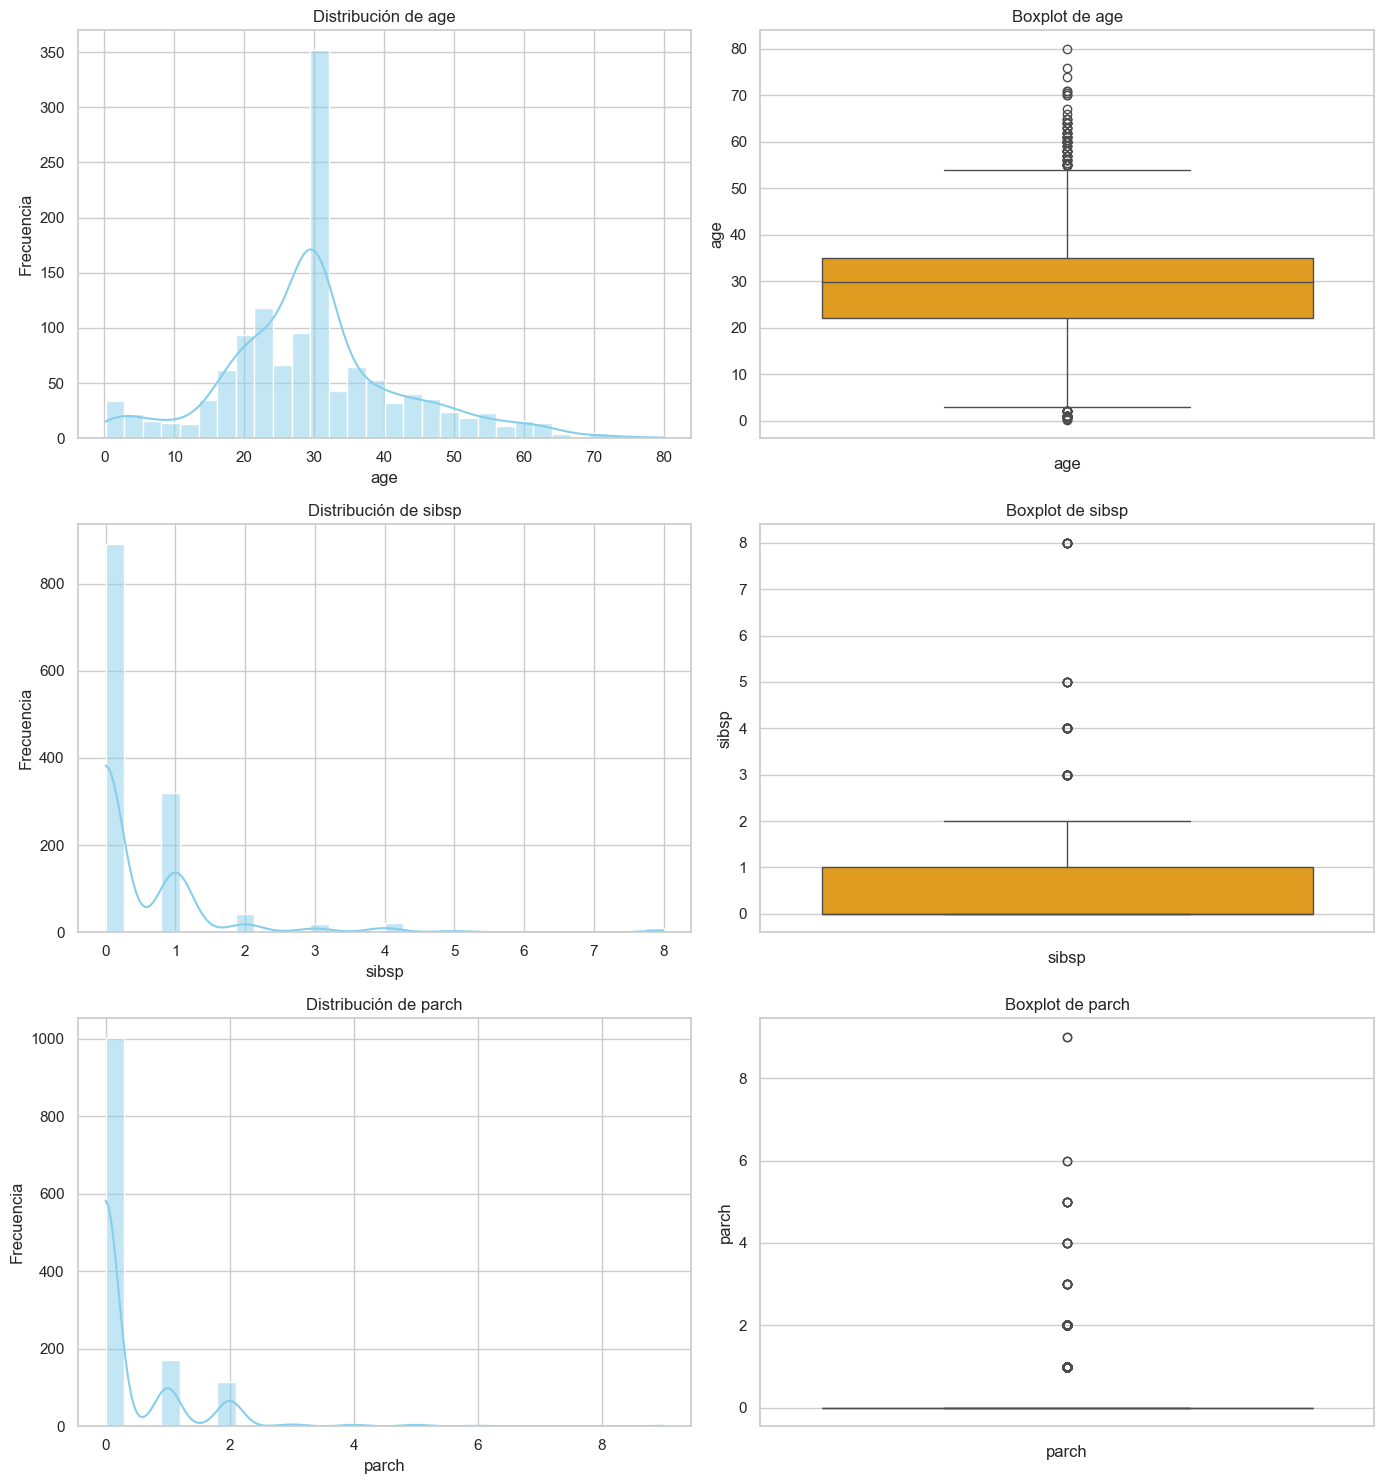

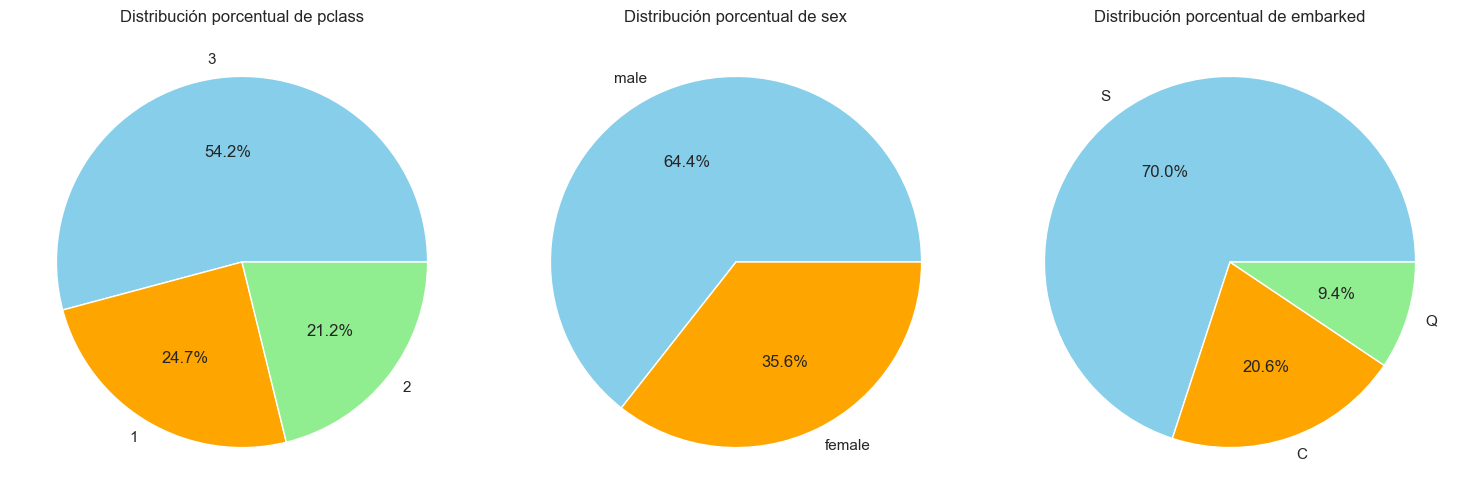

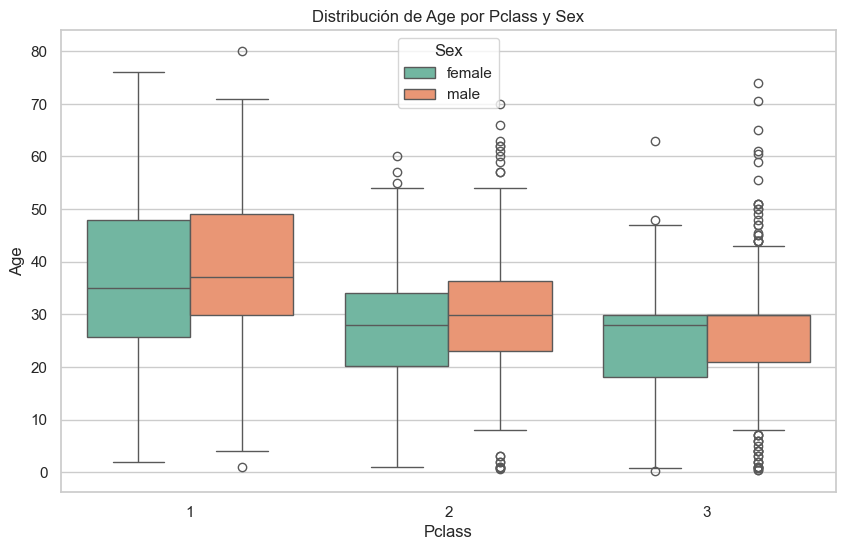

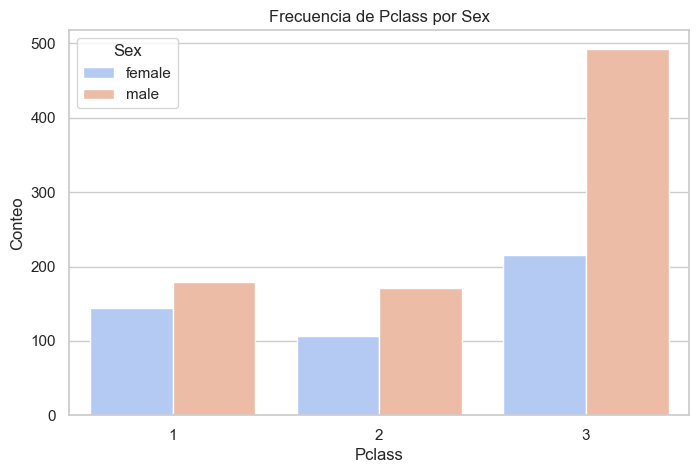

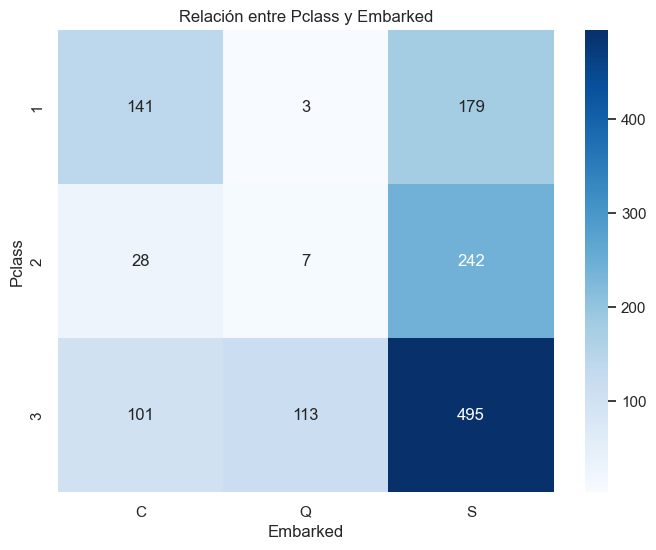

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set(style="whitegrid")

# Verificar las columnas disponibles en el dataset después del procesamiento
available_columns = data_for_analysis.columns

# Filtrar columnas numéricas excluyendo 'survived' y columnas eliminadas como 'fare'
numerical_columns = [
    col for col in data_for_analysis.select_dtypes(include=['int', 'float']).columns 
    if col in available_columns and col != 'survived'
]

# Filtrar columnas categóricas ignorando columnas eliminadas
categorical_columns = [
    col for col in data_for_analysis.select_dtypes(include='category').columns 
    if col in available_columns
]

# Gráficos univariados para variables numéricas
if numerical_columns:
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 5 * len(numerical_columns)))
    for i, col in enumerate(numerical_columns):
        # Histograma con KDE
        sns.histplot(data_for_analysis[col], kde=True, bins=30, color="skyblue", ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribución de {col}")
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(data=data_for_analysis[col], color="orange", ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot de {col}")
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Gráficos univariados para variables categóricas
if categorical_columns:
    fig, axes = plt.subplots(1, len(categorical_columns), figsize=(5 * len(categorical_columns), 5))
    for i, col in enumerate(categorical_columns):
        # Gráfico de pastel
        data_for_analysis[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=["skyblue", "orange", "lightgreen"], 
            ax=axes[i]
        )
        axes[i].set_title(f"Distribución porcentual de {col}")
        axes[i].set_ylabel("")

    plt.tight_layout()
    plt.show()


# Boxplot: Distribución de age por pclass y sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', hue='sex', data=data_for_analysis, palette="Set2")
plt.title("Distribución de Age por Pclass y Sex")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.legend(title="Sex")
plt.show()

# Countplot: Frecuencia de Pclass por Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='sex', data=data_for_analysis, palette="coolwarm")
plt.title("Frecuencia de Pclass por Sex")
plt.xlabel("Pclass")
plt.ylabel("Conteo")
plt.legend(title="Sex")
plt.show()

# Heatmap: Relación cruzada entre Pclass y Embarked
plt.figure(figsize=(8, 6))
cross_tab = pd.crosstab(data_for_analysis['pclass'], data_for_analysis['embarked'])
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d")
plt.title("Relación entre Pclass y Embarked")
plt.xlabel("Embarked")
plt.ylabel("Pclass")
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Restaurar 'PassengerId' desde el archivo test.csv si no está presente
if 'PassengerId' not in combined_data_cleaned.columns:
    print("La columna 'PassengerId' no está presente. Se restaurará desde el archivo original.")
    test_data_original = pd.read_csv(r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\test.csv")
    combined_data_cleaned.loc[combined_data_cleaned['source'] == 'test', 'PassengerId'] = test_data_original['PassengerId']

# Imputar valores faltantes en la columna 'age'
if 'age' in combined_data_cleaned.columns:
    # Calcular la desviación estándar y media para decidir
    std_dev_age = combined_data_cleaned['age'].std()
    mean_age = combined_data_cleaned['age'].mean()
    median_age = combined_data_cleaned['age'].median()
    
    if std_dev_age / mean_age > 0.5:  # Usar la mediana si hay alta dispersión
        combined_data_cleaned['age'] = combined_data_cleaned['age'].fillna(median_age)
        print(f"Imputados valores faltantes en 'age' con su mediana: {median_age}")
    else:  # Usar la media en caso contrario
        combined_data_cleaned['age'] = combined_data_cleaned['age'].fillna(mean_age)
        print(f"Imputados valores faltantes en 'age' con su media: {mean_age:.2f}")

# Verificar si quedan valores faltantes
print("\nValores faltantes después de la imputación en 'age':")
print(combined_data_cleaned['age'].isnull().sum())

# Guardar la columna PassengerId para el conjunto de prueba antes de eliminarla
test_passenger_ids = combined_data_cleaned.loc[combined_data_cleaned['source'] == 'test', 'PassengerId']

# Separar nuevamente los conjuntos en base a la columna 'source'
train_data = combined_data_cleaned[combined_data_cleaned['source'] == 'train']
test_data = combined_data_cleaned[combined_data_cleaned['source'] == 'test']

# Extraer las características y la variable objetivo para el entrenamiento
X_train = train_data.drop(columns=['survived', 'source', 'PassengerId'])
y_train = train_data['survived']

# Extraer las características para el conjunto de prueba (sin 'survived' y 'source')
X_test = test_data.drop(columns=['survived', 'source', 'PassengerId'])

# Verificar las formas de los datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Identificar columnas categóricas y numéricas
categorical_features = X_train.select_dtypes(include='category').columns
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns

# Crear transformadores para variables categóricas y numéricas
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
numerical_transformer = StandardScaler()

# Combinar transformaciones en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Aplicar preprocesamiento a los datos de entrenamiento y prueba
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Verificar las formas de los conjuntos transformados
print(f"X_train_transformed shape: {X_train_transformed.shape}")
print(f"X_test_transformed shape: {X_test_transformed.shape}")

La columna 'PassengerId' no está presente. Se restaurará desde el archivo original.
Imputados valores faltantes en 'age' con su media: 29.88

Valores faltantes después de la imputación en 'age':
0
X_train shape: (891, 6), y_train shape: (891,)
X_test shape: (418, 6)
X_train_transformed shape: (891, 9)
X_test_transformed shape: (418, 9)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Dividir los datos de entrenamiento en entrenamiento y validación
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_transformed, y_train, test_size=0.2, random_state=42
)

# Inicializar los modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando y evaluando el modelo: {name}")
    
    # Entrenar el modelo
    model.fit(X_train_split, y_train_split)
    
    # Predicción en el conjunto de validación
    y_pred = model.predict(X_valid_split)
    y_pred_proba = model.predict_proba(X_valid_split)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Métricas de evaluación
    accuracy = accuracy_score(y_valid_split, y_pred)
    f1 = f1_score(y_valid_split, y_pred)
    auc_roc = roc_auc_score(y_valid_split, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}" if auc_roc != "N/A" else "AUC-ROC: No aplica")
    print("\nReporte de Clasificación:")
    print(classification_report(y_valid_split, y_pred))

# Seleccionar el mejor modelo según Accuracy
best_model_name = max(models, key=lambda name: accuracy_score(
    y_valid_split, models[name].predict(X_valid_split)
))
best_model = models[best_model_name]
print(f"\nEl mejor modelo basado en Accuracy es: {best_model_name}")

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X_train_transformed, y_train)

# Predicción final en el conjunto de prueba
final_predictions = best_model.predict(X_test_transformed)

# Guardar las predicciones en un archivo CSV
output = pd.DataFrame({"PassengerId": test_passenger_ids, "Survived": final_predictions})
output.to_csv("submission.csv", index=False)
print("\nPredicciones realizadas y guardadas en 'submission.csv'.")


Entrenando y evaluando el modelo: Logistic Regression
Accuracy: 0.8045
F1 Score: 0.7552
AUC-ROC: 0.8766

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Entrenando y evaluando el modelo: K-Nearest Neighbors
Accuracy: 0.8101
F1 Score: 0.7571
AUC-ROC: 0.8493

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Entrenando y evaluando el modelo: Decision Tree
Accuracy: 0.7821
F1 Score: 0.7153

In [18]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import numpy as np

# Definir un diccionario para almacenar los modelos optimizados y sus mejores parámetros
optimized_models = {}
model_metrics = {}

# Hiperparámetros para cada modelo
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "LightGBM": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.1, 0.2],
        "num_leaves": [15, 31, 63]
    }
}

# Evaluar y optimizar cada modelo
for name, model in models.items():
    print(f"\nEvaluando el modelo: {name}")
    
    # Validación cruzada inicial
    cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy promedio con validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    # Optimización de hiperparámetros
    if name in ["Logistic Regression", "K-Nearest Neighbors"]:
        search = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    else:
        search = RandomizedSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
    
    search.fit(X_train_transformed, y_train)
    best_model = search.best_estimator_
    optimized_models[name] = best_model
    print(f"Mejores hiperparámetros para {name}: {search.best_params_}")
    
    # Evaluar el modelo optimizado
    y_pred = best_model.predict(X_valid_split)
    y_pred_proba = best_model.predict_proba(X_valid_split)[:, 1] if hasattr(best_model, "predict_proba") else None
    
    accuracy = accuracy_score(y_valid_split, y_pred)
    f1 = f1_score(y_valid_split, y_pred)
    auc_roc = roc_auc_score(y_valid_split, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    model_metrics[name] = {
        "accuracy": accuracy,
        "f1_score": f1,
        "auc_roc": auc_roc
    }
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}" if auc_roc != "N/A" else "AUC-ROC: No aplica")

# Comparar modelos basándose en métricas
print("\nComparación de Modelos:")
for name, metrics in model_metrics.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}" if value != "N/A" else f"{metric.capitalize()}: No aplica")

# Entrenar el mejor modelo final con todos los datos de entrenamiento
best_model_name = max(model_metrics, key=lambda name: model_metrics[name]["accuracy"])
final_model = optimized_models[best_model_name]
final_model.fit(X_train_transformed, y_train)

# Predicción final en el conjunto de prueba
final_predictions = final_model.predict(X_test_transformed)

# Guardar las predicciones en un archivo CSV
output = pd.DataFrame({"PassengerId": test_passenger_ids, "Survived": final_predictions})
output.to_csv("submission.csv", index=False)
print(f"\nEl mejor modelo final es: {best_model_name}")
print("\nPredicciones realizadas y guardadas en 'submission.csv'.")


Evaluando el modelo: Logistic Regression
Accuracy promedio con validación cruzada: 0.7957 (+/- 0.0220)
Mejores hiperparámetros para Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.8045
F1 Score: 0.7445
AUC-ROC: 0.8692

Evaluando el modelo: K-Nearest Neighbors
Accuracy promedio con validación cruzada: 0.7913 (+/- 0.0193)
Mejores hiperparámetros para K-Nearest Neighbors: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8380
F1 Score: 0.7943
AUC-ROC: 0.9223

Evaluando el modelo: Decision Tree
Accuracy promedio con validación cruzada: 0.7880 (+/- 0.0387)
Mejores hiperparámetros para Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3}
Accuracy: 0.7989
F1 Score: 0.7273
AUC-ROC: 0.8451

Evaluando el modelo: XGBoost
Accuracy promedio con validación cruzada: 0.8148 (+/- 0.0145)
Mejores hiperparámetros para XGBoost: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.8939
F1 Score: 0.8671
AUC-ROC: 0.9467

Evaluando e

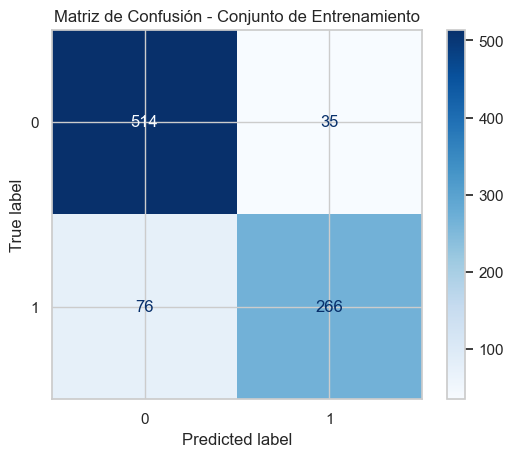

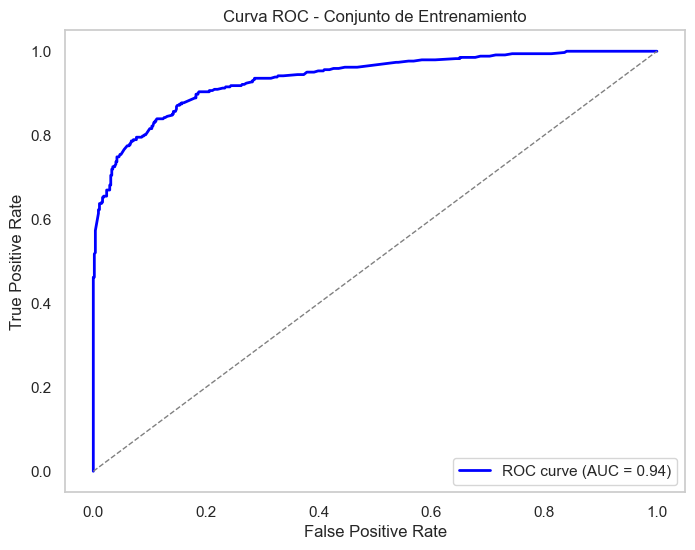

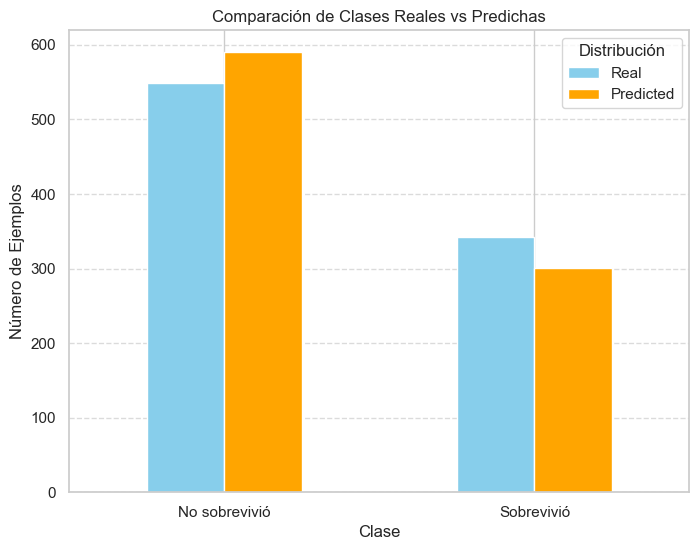

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Predicciones en el conjunto de entrenamiento
train_predictions = final_model.predict(X_train_transformed)
train_pred_prob = final_model.predict_proba(X_train_transformed)[:, 1] if hasattr(final_model, "predict_proba") else None

# 1. Matriz de Confusión
cm = confusion_matrix(y_train, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.show()

# 2. Curva ROC y AUC
if train_pred_prob is not None:
    fpr, tpr, _ = roc_curve(y_train, train_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Conjunto de Entrenamiento")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 3. Gráfico de Barras: Comparación de clases reales vs predicciones
real_counts = y_train.value_counts()
pred_counts = pd.Series(train_predictions).value_counts()

comparison_df = pd.DataFrame({
    "Real": real_counts,
    "Predicted": pred_counts
}).fillna(0)

comparison_df.plot(kind="bar", figsize=(8, 6), color=["skyblue", "orange"])
plt.title("Comparación de Clases Reales vs Predichas")
plt.xlabel("Clase")
plt.ylabel("Número de Ejemplos")
plt.xticks(ticks=[0, 1], labels=["No sobrevivió", "Sobrevivió"], rotation=0)
plt.legend(title="Distribución")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [20]:
output.to_csv(r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\submission.csv", index=False)
print("Predicciones guardadas en: C:\\Users\\Andy\\Documents\\CodingDojo\\Módulo_2_ML\\Tareas_ML\\Data_Tareas_ML\\Titanic\\submission.csv")

Predicciones guardadas en: C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\submission.csv
